[![Binder](http://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/JuliethLopez/Stochastic-gene-regulatory-networks/main?filepath=APLICATION.ipynb)


<a href="https://colab.research.google.com/github/JuliethLopez/Stochastic-gene-regulatory-networks/blob/master/APLICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Stochastic gene regulatory networks</center>

For implement this code is necessary to have some libraries installed which are listed in the requirements. In this node its possible to introduce *n* genes with the unique condition of having only two states for each gene: Activated or degraded. All the classes and fuctions are in the R notebook **STATES_CODE.R** and all the code works in this notebook calling only one function **complete_simulation**. Here we are goint to show an example using three genes.

## Requirements

- rlist
- igraph
- gtools
- markovchain
- data.table
- RColorBrewer

## Implementation

The fisrt step is to call the classes and functions that are in the notebook **STATES_CODE.R**, this is possible using the function `source`.

In [25]:
source('STATES_CODE.R')

Now, we can define each gene using the class `gen`, its possible to introduce a name for the identification, a list of which genes are activated by the gene that we are creating and the propensities for activation and degradation. Here we are defining three genes A, B and C.

In [26]:
#Here, we define each gene.
gen_A = gen(name="A",
            activate_list = list("B","C"),
            prob_activation = 0.1,
            prob_degradation = 0.2)

gen_B = gen(name="B",
            activate_list = list("C"),
            inhibit_list = list("A"),
            prob_activation = 0.5,
            prob_degradation = 0.9)

gen_C = gen(name="C",
            prob_activation = 0.3,
            prob_degradation = 0.5)

Now, we need to made a list with all the genes created, this list is the entry to the next function.

In [27]:
input_gen_list = list(gen_A, gen_B, gen_C)

With the function `complete_simulation` we are going obtain four graphics.
1. The firt graphic shows the interaction between genes using the raw entries.
2. The secod graphic shows the fixed states based on the interaction between genes, so, are showed only the states that actually can exist based on the interactivity.
3. Here the fixed states are keeped but the interactions are modificated using the propensities of activation and degradation.
4. The last network shows the compact result of *n* simulations (100 by default), where the thickness of the arrows represent the variance of the probability to pass from one state to the other, and the number that appear above each arrow indicates the mean probability.

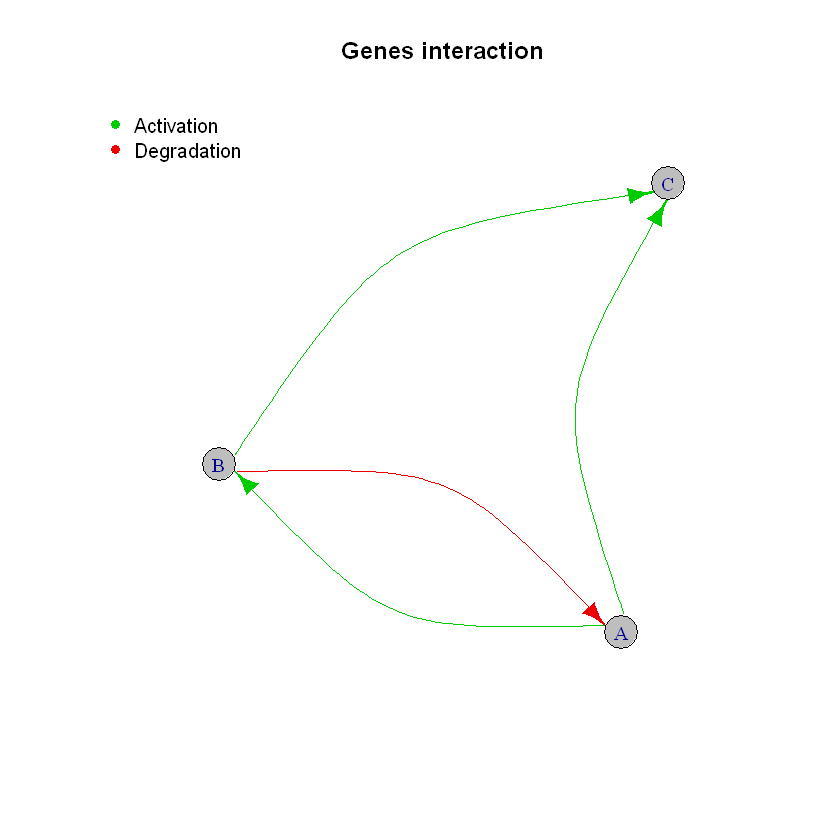

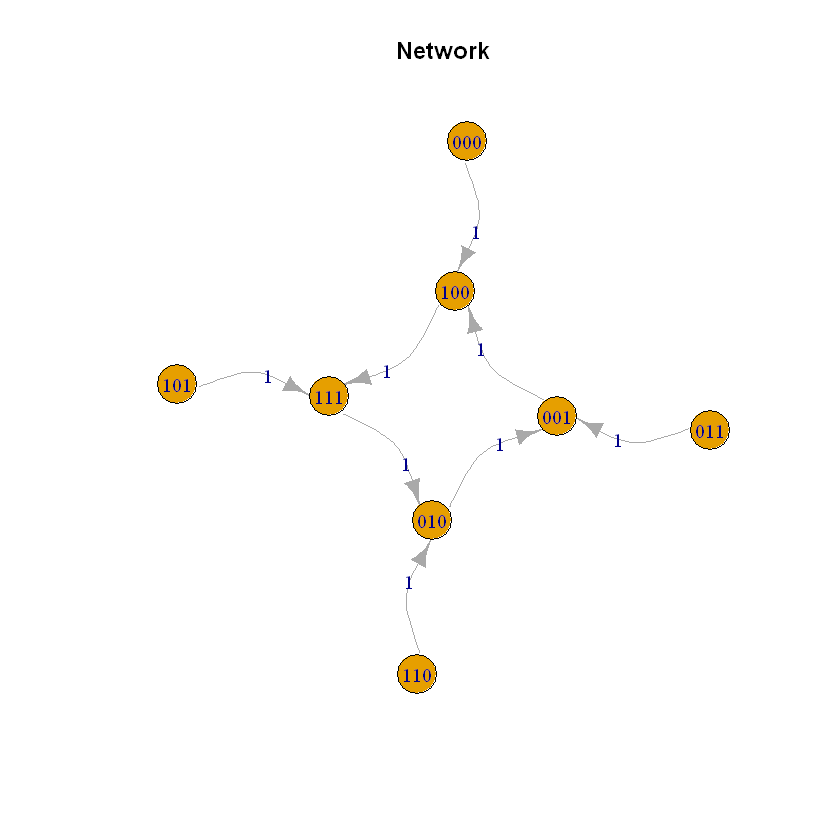

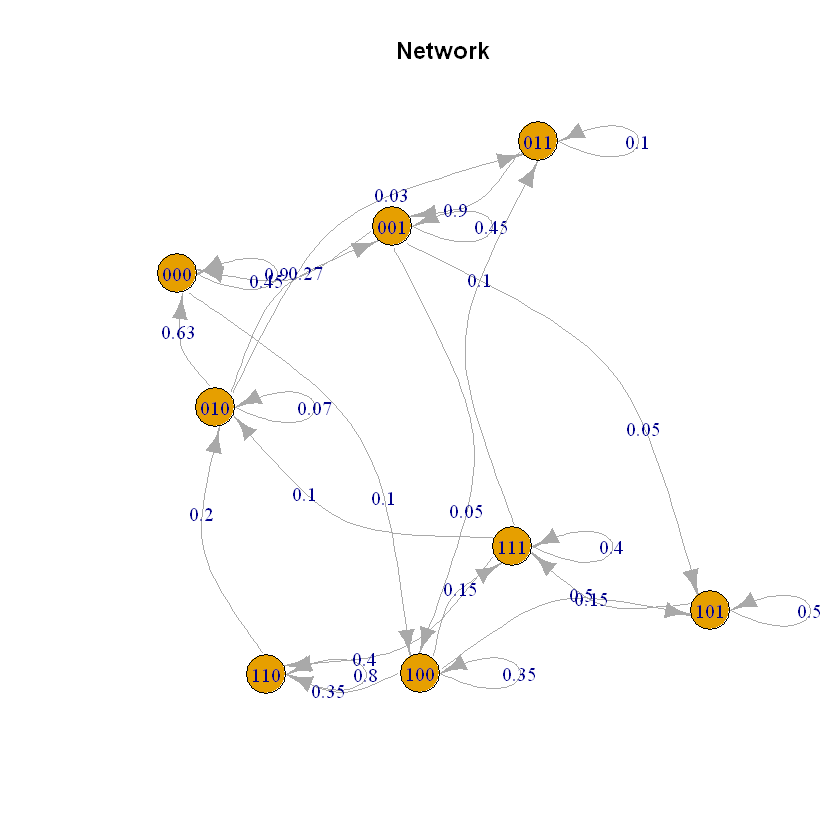

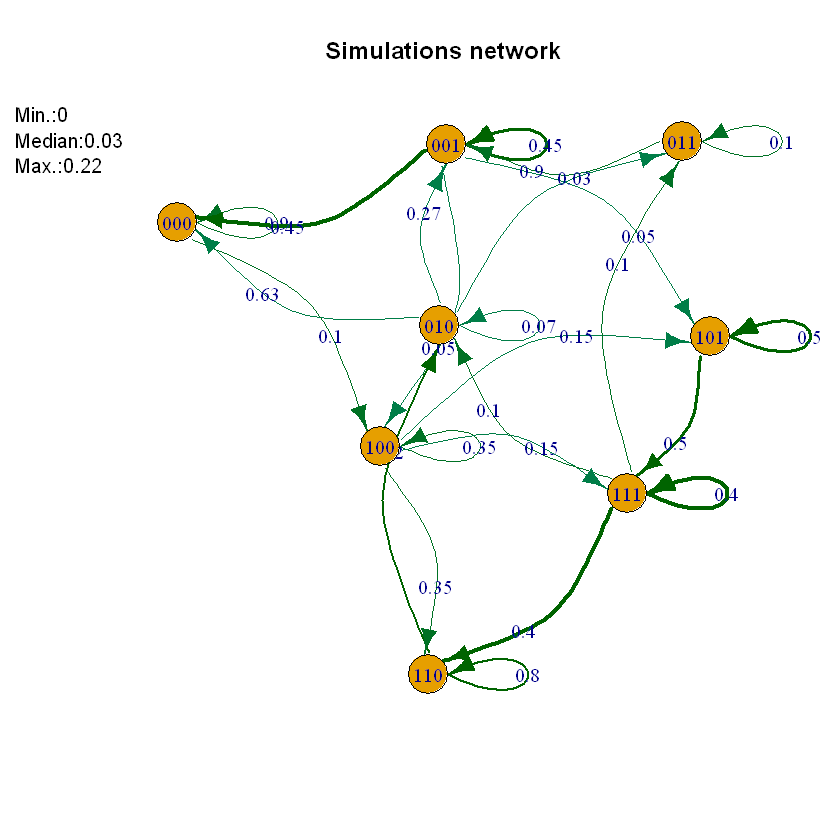

In [29]:
test=complete_simulation(input_gen_list,num_simulations=200)

Look that all the information with which is obtained the graphics is saved in the object *test*, its possible to obtain the initial propensities, the matrix states that have the fixed states, the initial transition matrix, that have the mean probabilities that are used to generate the 3rd graphic, the genes introduced in the beginning, the variance obtained in the simulations for each edge of the network with probabilities and the net where some of this information and another can be found.

In [30]:
test$initial.trans.matrix

,000,001,010,011,100,101,110,111
000,0.90,0.00,0.00,0.00,0.10,0.00,0.00,0.00
001,0.45,0.45,0.00,0.00,0.05,0.05,0.00,0.00
010,0.63,0.27,0.07,0.03,0.00,0.00,0.00,0.00
011,0.00,0.90,0.00,0.10,0.00,0.00,0.00,0.00
100,0.00,0.00,0.00,0.00,0.35,0.15,0.35,0.15
101,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.50
110,0.00,0.00,0.20,0.00,0.00,0.00,0.80,0.00
111,0.00,0.00,0.10,0.10,0.00,0.00,0.40,0.40


In [31]:
test$var_simulation

,000,001,010,011,100,101,110,111
000,0.05296000,0.000000000,0.00000000,0.000000000,0.05296000,0.00000000,0.00000000,0.00000000
001,0.21746068,0.211551520,0.00000000,0.000000000,0.02276725,0.03202319,0.00000000,0.00000000
010,0.04295519,0.009647278,0.04306716,0.006156867,0.00000000,0.00000000,0.00000000,0.00000000
011,0.00000000,0.080180847,0.00000000,0.080180847,0.00000000,0.00000000,0.00000000,0.00000000
100,0.00000000,0.000000000,0.00000000,0.000000000,0.08053421,0.01723385,0.08731191,0.01410018
101,0.00000000,0.000000000,0.00000000,0.000000000,0.00000000,0.16607713,0.00000000,0.16607713
110,0.00000000,0.000000000,0.11609976,0.000000000,0.00000000,0.00000000,0.11609976,0.00000000
111,0.00000000,0.000000000,0.07092055,0.051029900,0.00000000,0.00000000,0.22410741,0.22185689
